In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [3]:
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = train_df.drop("label", axis=1)
y = train_df["label"]

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier(weights="distance", n_neighbors=3)

# grid_params = {
#     'weights': ['uniform', 'distance'],
#     'n_neighbors': [1, 2, 3, 4, 5],
# }

# gs = GridSearchCV(model, 
#                   grid_params, 
#                   verbose=3, 
#                   cv=3)

model.fit(X, y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [7]:
y_pred = model.predict(test_df)

In [8]:
test_df["Label"] = y_pred

In [9]:
submission_df = test_df[["Label"]]

submission_df.to_csv("submission.csv", index_label="ImageId")

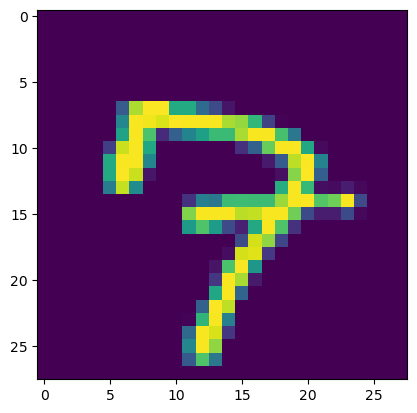

Predicted Value: 7


In [10]:
if __name__ == "__main__":    
    copy_test = test_df.drop("Label", axis = 1)
    random_index = 5
    digit = copy_test.iloc[[random_index]].values.reshape(28, 28)
    predicted_digit = model.predict(copy_test.iloc[[random_index]])

    plt.imshow(digit)

    plt.show()

    print("Predicted Value:", predicted_digit[0])